In [1]:
import json
import numpy as np
import proplot as pplt

%matplotlib inline

In [57]:
import json

with open("data.json", "r") as fp:
    data = json.load(fp)

In [58]:
bfs = {}
for band in ["g", "r", "i", "z"]:
    bfs[band] = []
    for tname, bd in data.items():
        if band in bd:
            for _, res in bd[band].items():
                bfs[band].append(res["no_box_frac"])

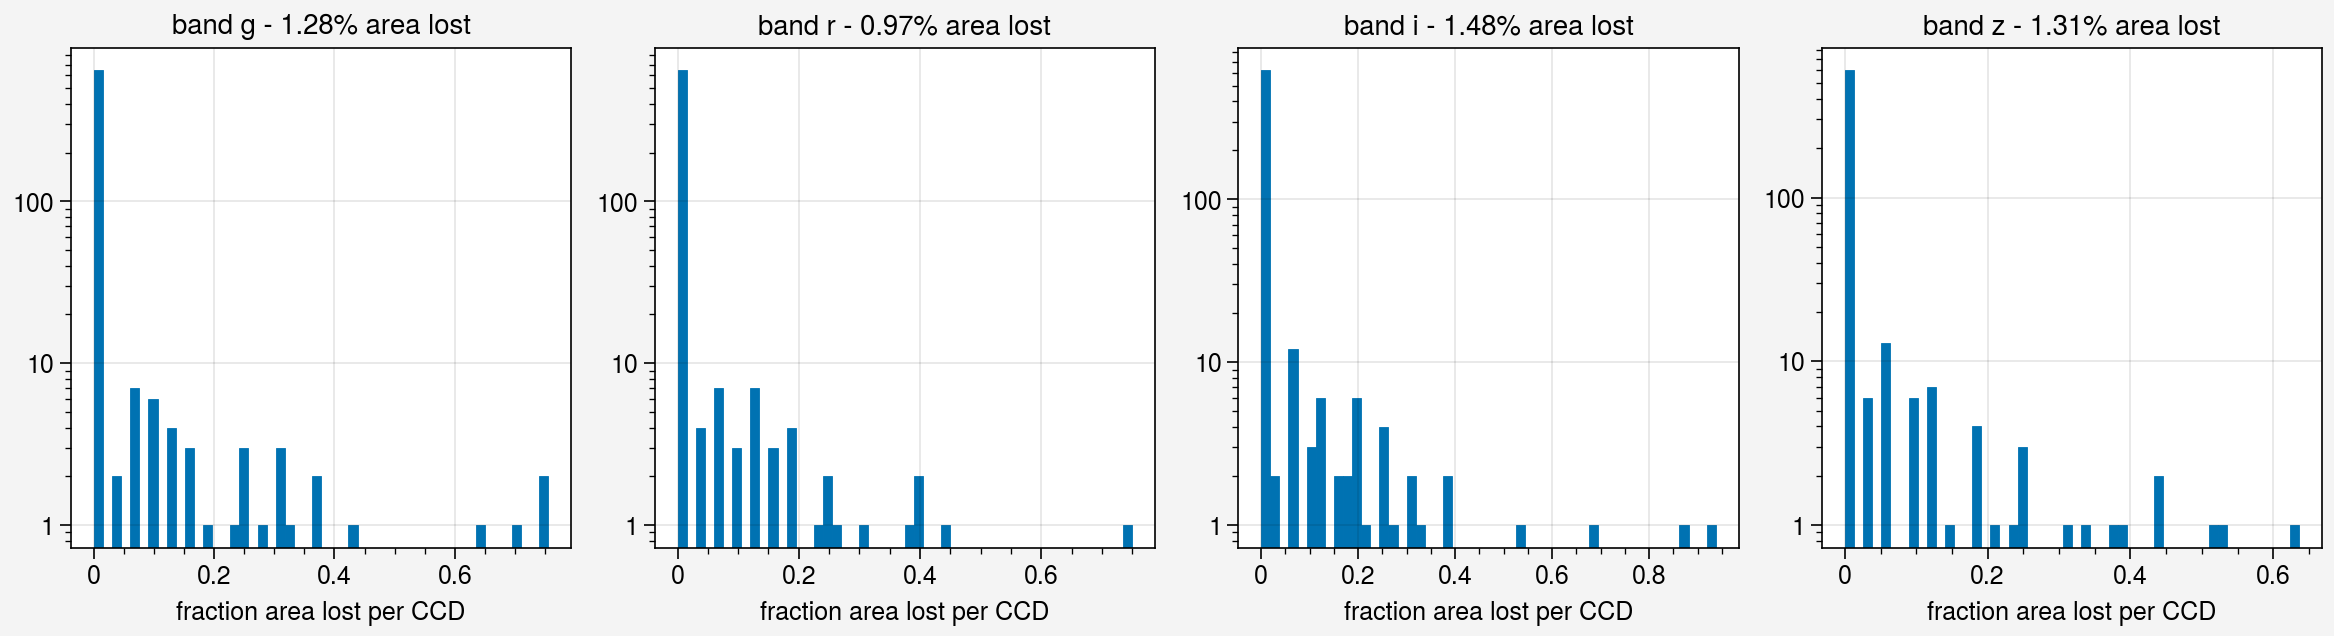

In [59]:
fig, axs = pplt.subplots(nrows=1, ncols=4, share=0)

for i, band in enumerate(["g", "r", "i", "z"]):
    if len(bfs[band]) > 0:
        axs[i].hist(bfs[band], bins=50, log=True)
        axs[i].set_title("band %s - %0.2f%% area lost" % (band, np.sum(bfs[band])/len(bfs[band])*100))
        axs[i].set_xlabel("fraction area lost per CCD")